Univariable Linear regression model from scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Explanation:
#	numpy helps with numerical operations, arrays, and matrix calculations.
#	matplotlib.pyplot is for plotting graphs.

np.random.seed(42)
# Ensures repeatability by fixing the random generator's seed.

X = 2 * np.random.rand(100, 1)
# This creates 100 random numbers between 0 and 2, and stores them in a 2D array (100 rows, 1 column). Think of X as your input feature (e.g., size of house).


y = 4 + 3 * X + np.random.randn(100, 1)

# This creates the target values using the linear equation y = 4 + 3X + noise, where:
#•	4 is the intercept (β₀),
#•	3 is the slope (β₁),
#•	np.random.randn adds random noise to simulate real-world imperfection.

X_b = np.c_[np.ones((100, 1)), X]

# Adds a bias term (intercept). It prepends a column of 1s to X. Now X_b has two columns: [1, x].

theta = np.random.randn(2, 1)

#Initializes model parameters (theta) randomly. We’ll update these using gradient descent.

learning_rate = 0.4  # 0.5  #0.01,100
iterations = 100   #100

# learning_rate: how fast we move toward the minimum error.
# iterations: how many times we update the model.

#Gradient Descent Loop

for i in range(iterations):
    gradients = 2/100 * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients

### Step-by-step:
#  X_b.dot(theta) computes the predicted y values.
#  Subtracting y gives the error.
#  .T.dot(...) calculates the gradient (partial derivative of MSE).
#	Multiply by 2/100 because of MSE derivative formula.
#	Subtract from theta to move in the direction of decreasing error.
###


print("Learned parameters:", theta.ravel())
#Outputs the learned intercept and slope.

plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.show()

#Plots the original data (scatter) and our fitted line (in red).

Linear Regression model on diamond dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

In [ ]:
X= 2*np.random.rand(100,1)
Y= 4+3*X+np.random.randn(100,1)

In [ ]:
X_b = np.c_[np.ones((100,1)),X]  # intercept

In [ ]:
theta = np.random.randn(2,1)

In [ ]:
# learning rate, #iterations

learning_rate= 0.5
iterations= 1000

In [ ]:
for i in range(iterations):
    gradients = 2/100 * X_b.T.dot(X_b.dot(theta)-Y)
    theta = theta - learning_rate*gradients

print ("learned parameters", theta.ravel())


learned parameters [-5.72492701e+27 -6.48389517e+27]


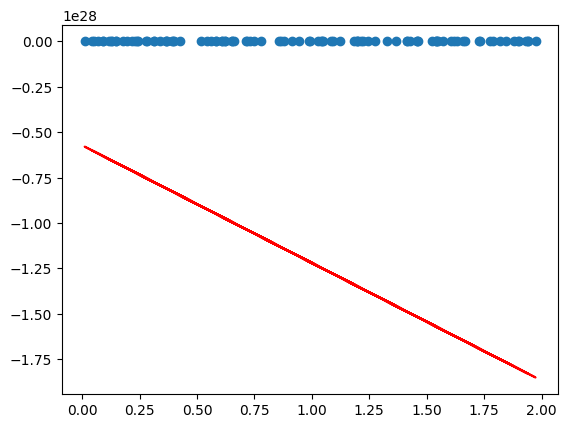

In [ ]:
plt.scatter (X, Y)
plt.plot (X, X_b.dot(theta), 'r')
plt.show ()

Real dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
df = sns.load_dataset ('diamonds')

In [ ]:
print (df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [ ]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


In [ ]:
print (df.describe())

              carat         depth  ...             y             z
count  53940.000000  53940.000000  ...  53940.000000  53940.000000
mean       0.797940     61.749405  ...      5.734526      3.538734
std        0.474011      1.432621  ...      1.142135      0.705699
min        0.200000     43.000000  ...      0.000000      0.000000
25%        0.400000     61.000000  ...      4.720000      2.910000
50%        0.700000     61.800000  ...      5.710000      3.530000
75%        1.040000     62.500000  ...      6.540000      4.040000
max        5.010000     79.000000  ...     58.900000     31.800000

[8 rows x 7 columns]


In [ ]:
# artificially putting missing values

df.loc[df.sample(frac =0.05).index, 'carat'] = np.nan
df.loc[df.sample(frac =0.03).index, 'cut'] = np.nan

In [ ]:
print (df.isnull().sum())

carat      2697
cut        1618
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


imputation : mean, median    (numerical)
string  : mode  (values with highest frequency)

> 40%, 50% : drop the column

In [ ]:
df['carat'].fillna(df['carat'].mean(), inplace = True)
df['cut'].fillna(df['cut'].mode()[0], inplace = True)

/tmp/ipython-input-121-3618606209.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['carat'].fillna(df['carat'].mean(), inplace = True)
/tmp/ipython-input-121-3618606209.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [ ]:
#Exercise:   check the distribution of the attributes , based on the distribution that mean, median, mode

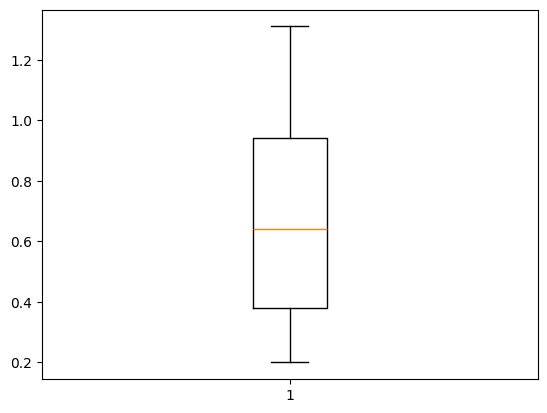

In [ ]:
# outliers

plt.boxplot(df['carat'])
plt.show()

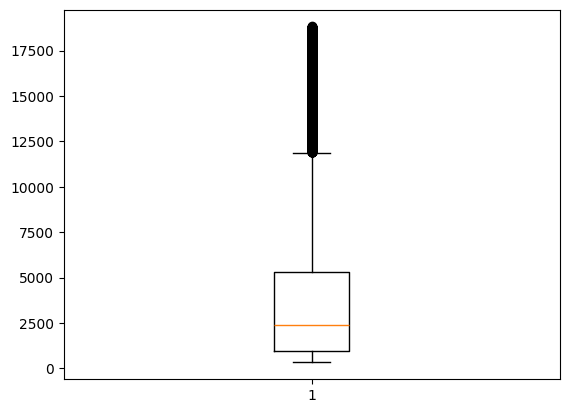

In [ ]:
plt.boxplot(df['price'])
plt.show()

In [ ]:
#Remove outliers by using IQR method

Q1 = df['carat'].quantile(0.25)
Q3 = df['carat'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df = df[(df['carat']>=lower) & (df['carat']<=upper)]


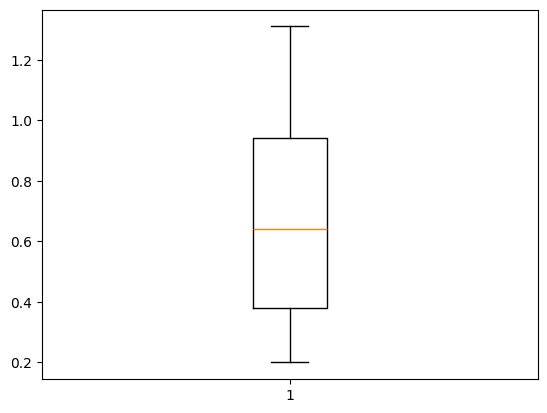

In [ ]:
plt.boxplot(df['carat'])
plt.show()

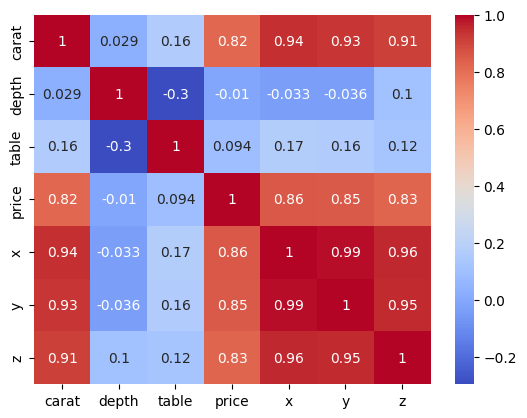

In [ ]:
# relationship between the attributes correlation matrix
numeric_df= df.select_dtypes(include = np.number)

sns.heatmap(numeric_df.corr(), annot = True, cmap="coolwarm")
plt.show()

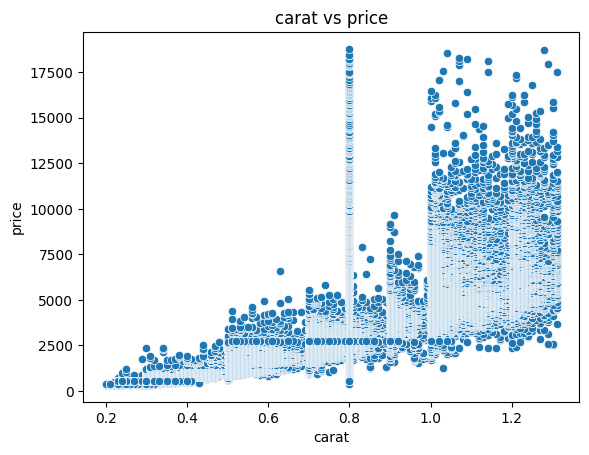

In [ ]:
sns.scatterplot(x='carat', y='price', data=df)
plt.title ("carat vs price")
plt.show()

In [ ]:
df.drop('depth', axis=1, inplace=True)
df.drop('table', axis=1, inplace=True)

In [ ]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 47337 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    47337 non-null  float64 
 1   cut      47337 non-null  category
 2   color    47337 non-null  category
 3   clarity  47337 non-null  category
 4   price    47337 non-null  int64   
 5   x        47337 non-null  float64 
 6   y        47337 non-null  float64 
 7   z        47337 non-null  float64 
dtypes: category(3), float64(4), int64(1)
memory usage: 2.3 MB
None


In [ ]:
# Feature engineering (creating new features from existing features)

df ['volume'] = df['x']*df['y']*df['z']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47337 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    47337 non-null  float64 
 1   cut      47337 non-null  category
 2   color    47337 non-null  category
 3   clarity  47337 non-null  category
 4   price    47337 non-null  int64   
 5   x        47337 non-null  float64 
 6   y        47337 non-null  float64 
 7   z        47337 non-null  float64 
 8   volume   47337 non-null  float64 
dtypes: category(3), float64(5), int64(1)
memory usage: 2.7 MB


In [ ]:
df.drop(['x','y','z'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47337 entries, 0 to 53939
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    47337 non-null  float64 
 1   cut      47337 non-null  category
 2   color    47337 non-null  category
 3   clarity  47337 non-null  category
 4   price    47337 non-null  int64   
 5   volume   47337 non-null  float64 
dtypes: category(3), float64(2), int64(1)
memory usage: 1.6 MB


In [ ]:
# x,y, z  while volume

In [ ]:
#FEature scaling  : normalization standardization

In [ ]:
X= df.drop('price', axis=1)
y= df['price']

In [ ]:
X_numerical = X.select_dtypes(include=np.number)

scaler_std = StandardScaler()
# Apply the scaler to the numerical columns only
X_std = scaler_std.fit_transform(X_numerical)

In [ ]:
#min_max_scaler = MinMaxScaler()
#X_minmax = min_max_scaler.fit_transform(X_numerical)

In [ ]:
X_std= pd.DataFrame(X_std, columns=X_numerical.columns)

display (X_std.head())

,carat,volume
0,-1.446878,-1.348485
1,-1.512853,-1.418981
2,-1.446878,-1.350871
3,-1.248953,-1.185936
4,-1.182979,-1.086897


In [ ]:
#data splitting

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [ ]:
#linear regression model with SGD

sgd= SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd.fit(X_train, y_train)

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [ ]:
y_pred_sgd= sgd.predict(X_test)

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr= lr.predict(X_test)

In [ ]:
# model evaluation

In [ ]:
def evaluate (model_name, y_true, y_pred):
    print (f"{model_name}")
    print ("R_square", r2_score(y_true, y_pred))
    print ("MSE", mean_squared_error(y_true, y_pred))
    print ("MAE", mean_absolute_error(y_true, y_pred))
print()

In [ ]:
evaluate ("SGD", y_test, y_pred_sgd)
evaluate ("Linear regression", y_test, y_pred_lr)

SGD
R_square 0.7925783607024173
MSE 1332356.7409890075
MAE 705.5304743685308
Linear regression
R_square 0.7928994414992885
MSE 1330294.3035038824
MAE 703.2290239330457


lasso, ridge
interation, step size,
explore the other parameters in lr, sgd
use it on different datasets

preprocessing : min_max , linear correlation